Context:

Fantasy sports are online gaming platforms where participants draft and manage virtual teams of real professional sports players. Based on the performance of the players in the real world, players are allotted points in the fantasy sports platform every match. The objective is to create the best possible team with a fixed budget to score maximum fantasy points, and users compete against each other over an entire sports league or season. Some of these fantasy sports require actual financial investments for participation, with the chances of winning monetary rewards as well as free matchday tickets on a periodic basis.

The fantasy sports market has seen tremendous growth over the past few years, with a valuation of \\$18.6 billion in 2019. The football (soccer) segment led in terms of market share in 2019, with over 8 million participants worldwide, and is expected to retain its dominance over the next couple of years. Digitalization is one of the primary factors driving the growth of the fantasy sports market as it allows participants the opportunity to compete on a global level and test their skills. With an increase in smartphone usage and availability of fantasy sports apps, this market is expected to witness a globe surge and reach a \\$48.6 billion valuation by 2027.


Objective:

OnSports is a fantasy sports platform that has fantasy leagues for many different sports and has witnessed an increasing number of participants globally over the past 5 years. For each player, a price is set at the start, and the price keeps changing over time based on the performance of the players in the real world. With the new English Premier League season about to start, they have collected data from the past season and want to analyze it to determine the price of each player for the start of the new season. OnSports have hired you as a data scientist and asked you to conduct a cluster analysis to identify players of different potentials of each player based on previous season performance. This will help them understand the patterns in player performances and fantasy returns and decide the exact price to be set for each player for the upcoming football season.


Data Description:

Player_Name: Name of the player.
Club: Club in which the player plays.
Position: Position in which the player plays.
Goals_Scored: Number of goals scored by the player in the previous season.
Assists: Number of passes made by the player leading to goals in the previous season.
Total_Points: Total number of fantasy points scored by the player in the previous season.
Minutes: Number of minutes played by the player in the previous season.
Goals_Conceded: Number of goals conceded by the player in the previous season.
Creativity: A score, computed using a range of stats, that assesses player performance in terms of producing goalscoring opportunities for other players.
Influence: A score, computed using a range of stats, that evaluates a player's impact on a match, taking into account actions that could directly or indirectly affect the match outcome.
Threat: A score, computed using a range of stats, that gauges players who are most likely to score goals.
Bonus: Total bonus points received. The three best performing players in each match receive additional bonus points based on a score computed using a range of stats. 3 points are awarded to the highest scoring player, 2 to the second best, and 1 to the third.
Clean_Sheets: Number of matches without conceding a goal in the previous season.

###Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',20)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/Fantasy Sports Clustering/fpl_data.csv"
df=pd.read_csv(path)

In [4]:
df.head(20)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2
5,Cedric Soares,Arsenal,Defender,0,1,28,744,11,114.8,110.8,66,3,2
6,Daniel Ceballos,Arsenal,Midfielder,0,4,62,1609,17,422.3,359.8,141,7,6
7,David Luiz,Arsenal,Defender,1,0,41,1396,20,46.7,250.6,144,0,3
8,Edward Nketiah,Arsenal,Forward,2,1,36,411,6,97.3,116.6,211,5,1
9,Emile Smith Rowe,Arsenal,Midfielder,2,5,74,1438,10,385.1,273.2,222,3,9


### Performing Exploratory Data Analysis


In [10]:
df.describe()

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
count,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,1.907563,1.752101,58.516807,1336.909664,19.157563,195.976050,294.617647,224.962185,4.718487,4.745798
std,3.455562,2.708563,51.293559,1073.773995,15.946171,251.478541,267.779681,318.240377,6.252625,4.394312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,10.000000,268.750000,4.000000,8.300000,46.500000,5.750000,0.000000,0.000000
50%,0.500000,0.000000,48.000000,1269.500000,18.000000,96.950000,233.100000,104.500000,2.000000,4.000000
75%,2.000000,2.000000,94.250000,2256.250000,31.000000,296.950000,499.500000,298.250000,7.000000,8.000000
max,23.000000,14.000000,244.000000,3420.000000,68.000000,1414.900000,1318.200000,1980.000000,40.000000,19.000000


In [45]:
df.describe(include = 'O') # For categorical variables

,Player_Name,Club,Position
count,476,476,476
unique,476,17,4
top,Alex Runnarsson,Arsenal,Midfielder
freq,1,30,195


In [44]:
df[df['Goals_Scored'] == 0] #Checking for number of goals scored for 0

,Player_Name,Club,Position,Goals_Scored,Assists,...,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,...,0.0,16.6,0,0,0
2,Bernd Leno,Arsenal,Goalkeeper,0,0,...,0.0,702.2,2,11,11
4,Calum Chambers,Arsenal,Defender,0,3,...,169.4,171.8,77,3,2
5,Cedric Soares,Arsenal,Defender,0,1,...,114.8,110.8,66,3,2
6,Daniel Ceballos,Arsenal,Midfielder,0,4,...,422.3,359.8,141,7,6
...,...,...,...,...,...,...,...,...,...,...,...
464,Owen Otasowie,Wolverhampton Wanderers,Midfielder,0,1,...,25.9,38.2,34,0,0
465,Patrick Cutrone,Wolverhampton Wanderers,Forward,0,0,...,0.0,0.0,4,0,0
471,Ruben Vinagre,Wolverhampton Wanderers,Defender,0,0,...,25.3,31.2,0,0,0
472,Rui Pedro Patricio,Wolverhampton Wanderers,Goalkeeper,0,0,...,0.0,763.6,0,12,10


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     476 non-null    object 
 1   Club            476 non-null    object 
 2   Position        476 non-null    object 
 3   Goals_Scored    476 non-null    int64  
 4   Assists         476 non-null    int64  
 5   Total_Points    476 non-null    int64  
 6   Minutes         476 non-null    int64  
 7   Goals_Conceded  476 non-null    int64  
 8   Creativity      476 non-null    float64
 9   Influence       476 non-null    float64
 10  Threat          476 non-null    int64  
 11  Bonus           476 non-null    int64  
 12  Clean_Sheets    476 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 48.5+ KB


In [36]:
df['Club'].nunique()
df['Club'].value_counts()

Arsenal                     30
Crystal Palace              30
Leeds United                29
West Ham United             29
Tottenham Hotspurs          29
Newcastle United            29
Leicester City              29
Manchester United           28
Chelsea                     28
Brighton and Hove Albion    28
Everton                     27
Liverpool                   27
Manchester City             27
Southampton                 27
Burnley                     27
Aston Villa                 26
Wolverhampton Wanderers     26
Name: Club, dtype: int64

In [37]:
df['Position'].value_counts()

Midfielder    195
Defender      172
Forward        64
Goalkeeper     45
Name: Position, dtype: int64

In [49]:
df.isnull().sum()

Player_Name       0
Club              0
Position          0
Goals_Scored      0
Assists           0
Total_Points      0
Minutes           0
Goals_Conceded    0
Creativity        0
Influence         0
Threat            0
Bonus             0
Clean_Sheets      0
dtype: int64

<Axes: xlabel='Goals_Scored'>

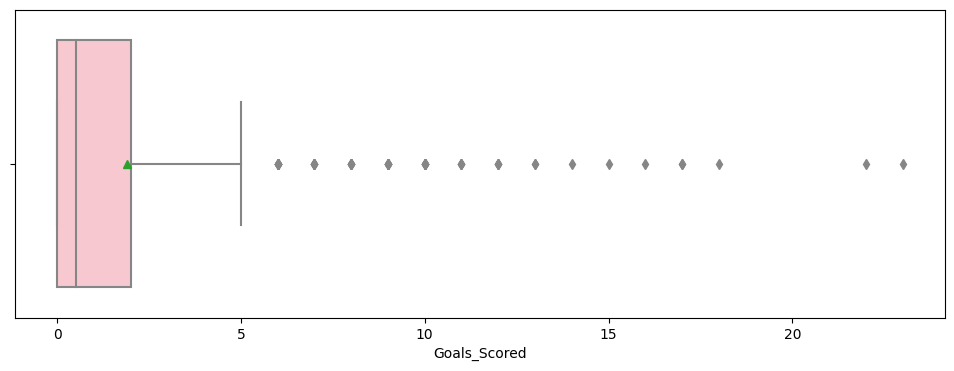

In [23]:
plt.figure(figsize = (12,4))
sns.boxplot(data=df, x = 'Goals_Scored', showmeans = True, color = 'pink')

<Axes: xlabel='Goals_Scored', ylabel='Count'>

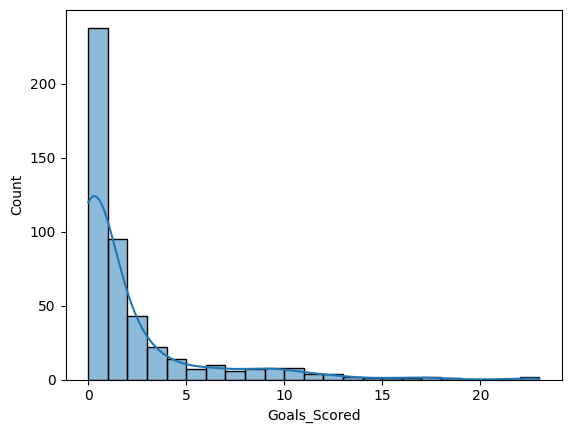

In [8]:
sns.histplot(data=df,x='Goals_Scored', bins = 23, kde = True)

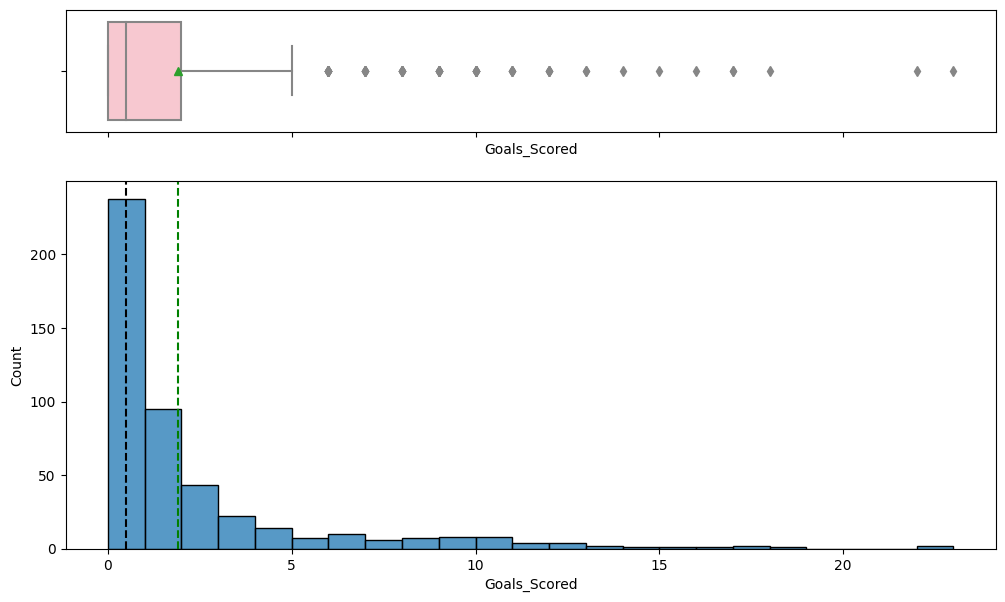

In [19]:
fig, ax = plt.subplots(2,1, sharex = True, gridspec_kw={'height_ratios':(1,3)}, figsize = (12,7))
sns.boxplot(data=df, x = 'Goals_Scored', showmeans = True, color = 'pink', ax = ax[0])
sns.histplot(data=df,x='Goals_Scored', bins = 23, kde = False, ax = ax[1])
ax[1].axvline(df['Goals_Scored'].mean(), linestyle = '--', color = 'green')
ax[1].axvline(df['Goals_Scored'].median(), linestyle = '--', color = 'black')

###Define a function for each numerical variable

In [20]:
def histogram_boxplot_func(df, feature, kde = True, bins = 23):
  fig, ax = plt.subplots(2,1, sharex = True, gridspec_kw={'height_ratios':(1,3)}, figsize = (12,7))
  sns.boxplot(data=df, x = feature, showmeans = True, color = 'pink', ax = ax[0])
  sns.histplot(data=df,x=feature, bins = 23, kde = False, ax = ax[1])
  ax[1].axvline(df[feature].mean(), linestyle = '--', color = 'green')
  ax[1].axvline(df[feature].median(), linestyle = '--', color = 'black')

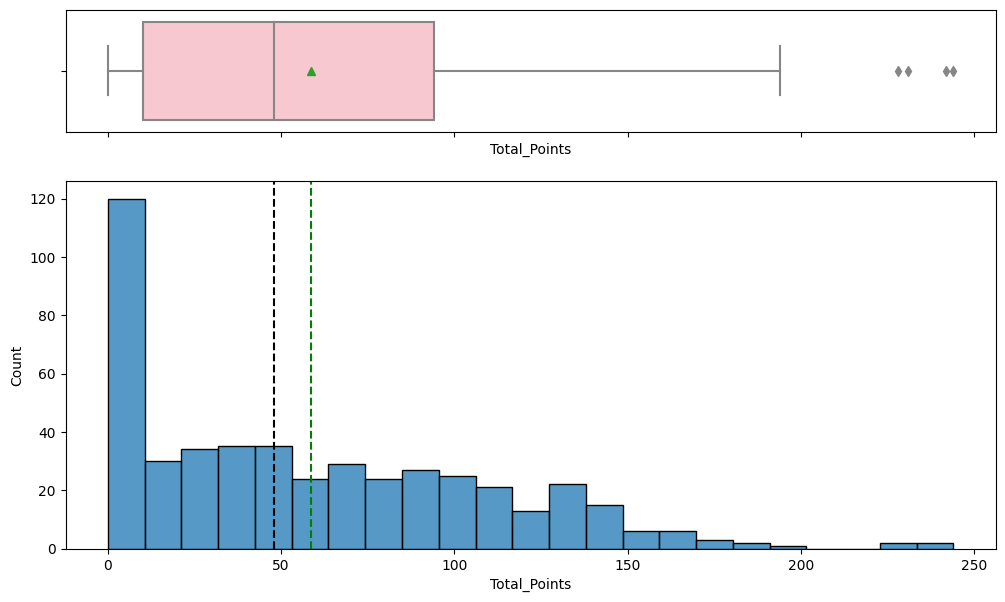

In [21]:
histogram_boxplot_func(df,'Total_Points', bins = 14)

In [28]:
df[df['Total_Points'] > 180] #Very few players have Total Points greater than 180

,Player_Name,Club,Position,Goals_Scored,Assists,...,Creativity,Influence,Threat,Bonus,Clean_Sheets
36,Emiliano Martinez,Aston Villa,Goalkeeper,0,0,...,20.0,1067.2,0,27,15
219,Patrick Bamford,Leeds United,Forward,17,11,...,371.0,867.2,1512,26,10
238,Jamie Vardy,Leicester City,Forward,15,14,...,356.6,819.2,1306,23,8
269,Mohamed Salah,Liverpool,Midfielder,22,6,...,825.7,1056.0,1980,21,11
315,Bruno Fernandes,Manchester United,Midfielder,18,14,...,1414.9,1292.6,1253,36,13
403,Harry Kane,Tottenham Hotspurs,Forward,23,14,...,659.1,1318.2,1585,40,12
405,Heung-Min Son,Tottenham Hotspurs,Midfielder,17,11,...,1049.9,1052.2,1046,26,13


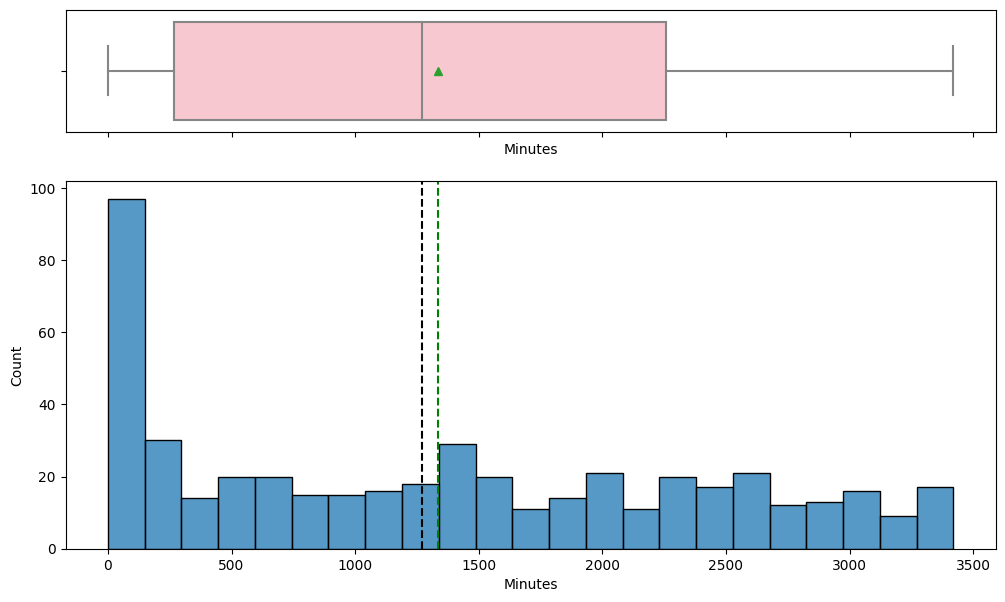

In [29]:
histogram_boxplot_func(df,'Minutes', bins = 23)

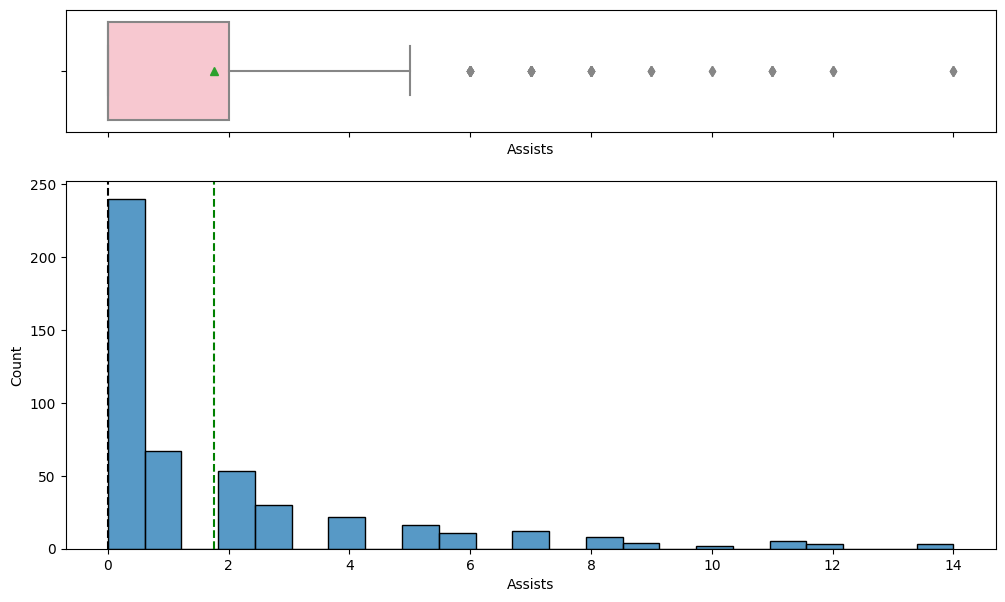

In [26]:
histogram_boxplot_func(df,'Assists',bins = 14)

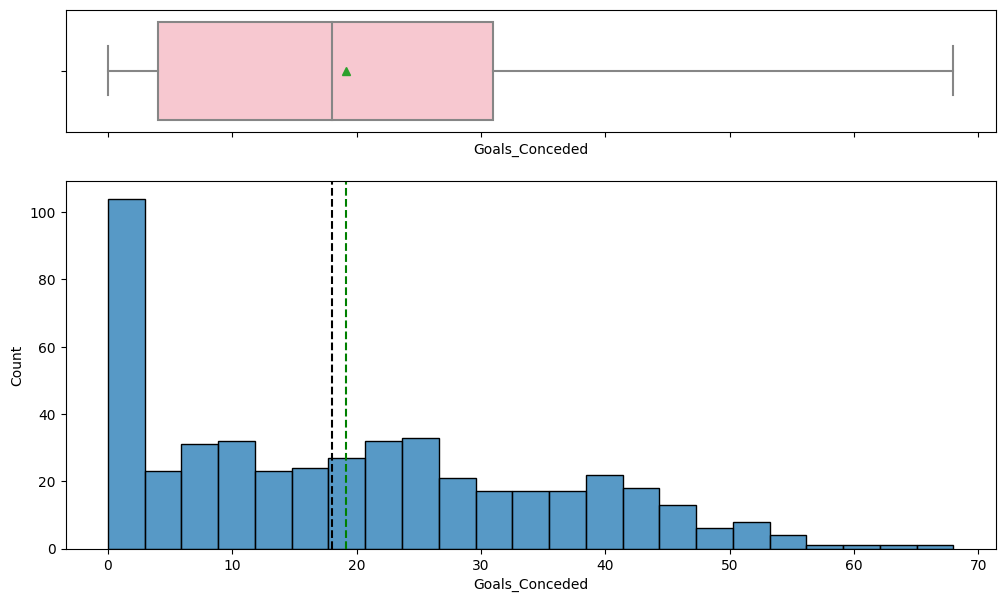

In [30]:
histogram_boxplot_func(df,'Goals_Conceded',bins = 14)

In [35]:
df[df['Goals_Conceded'] > 55] ## Armstrong seems to have scored a lot of goals. His creativity, influence and threat is also very high

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
140,Cheikhou Kouyate,Crystal Palace,Midfielder,1,0,82,3121,56,103.0,574.8,134,2,8
167,Vicente Guaita,Crystal Palace,Goalkeeper,0,0,124,3330,64,0.0,819.4,0,15,8
365,Alex McCarthy,Southampton,Goalkeeper,0,0,94,2700,57,0.0,741.2,0,8,7
374,James Ward-Prowse,Southampton,Midfielder,8,7,156,3420,68,971.2,940.0,355,17,9
375,Jan Bednarek,Southampton,Defender,1,1,94,3100,62,75.0,692.0,164,11,9
387,Stuart Armstrong,Southampton,Midfielder,4,7,115,2764,56,496.7,541.2,457,4,8


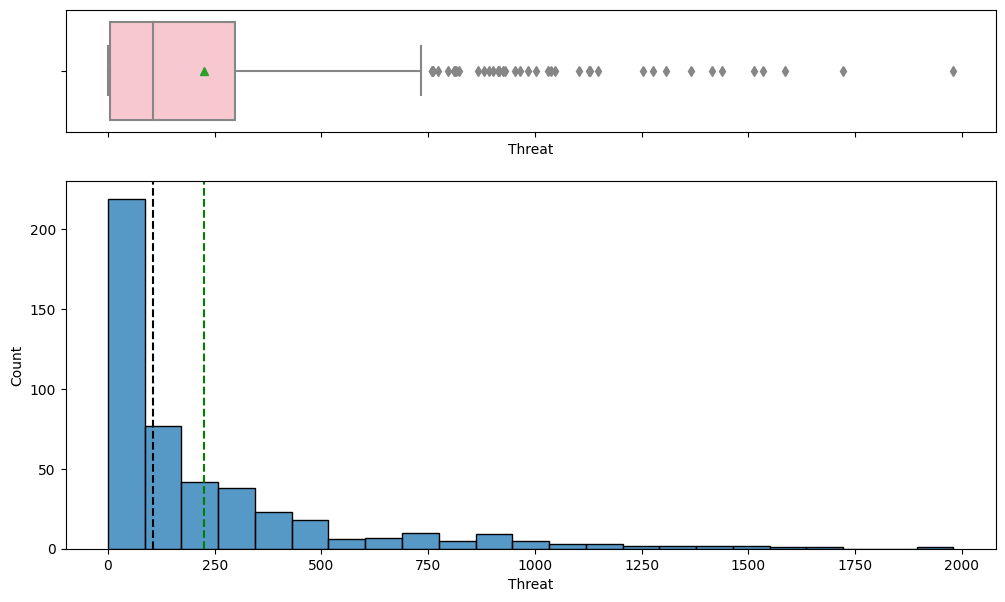

In [36]:
histogram_boxplot_func(df,'Threat',bins = 14)

In [37]:
df[df['Threat']>1250]

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
51,Ollie Watkins,Aston Villa,Forward,14,9,168,3328,46,610.4,815.4,1721,18,14
136,Timo Werner,Chelsea,Forward,6,12,128,2598,29,532.4,514.8,1276,7,13
177,Dominic Calvert-Lewin,Everton,Forward,16,6,165,2871,39,308.0,745.8,1439,21,11
219,Patrick Bamford,Leeds United,Forward,17,11,194,3052,50,371.0,867.2,1512,26,10
238,Jamie Vardy,Leicester City,Forward,15,14,187,2838,44,356.6,819.2,1306,23,8
269,Mohamed Salah,Liverpool,Midfielder,22,6,231,3077,41,825.7,1056.0,1980,21,11
275,Roberto Firmino,Liverpool,Forward,9,8,141,2837,39,643.2,729.4,1415,15,10
276,Sadio Mane,Liverpool,Midfielder,11,11,176,2808,28,809.7,808.8,1535,14,12
300,Raheem Sterling,Manchester City,Midfielder,10,9,154,2534,23,584.1,663.4,1366,10,14
315,Bruno Fernandes,Manchester United,Midfielder,18,14,244,3101,36,1414.9,1292.6,1253,36,13


###Analyzing Categorical Features

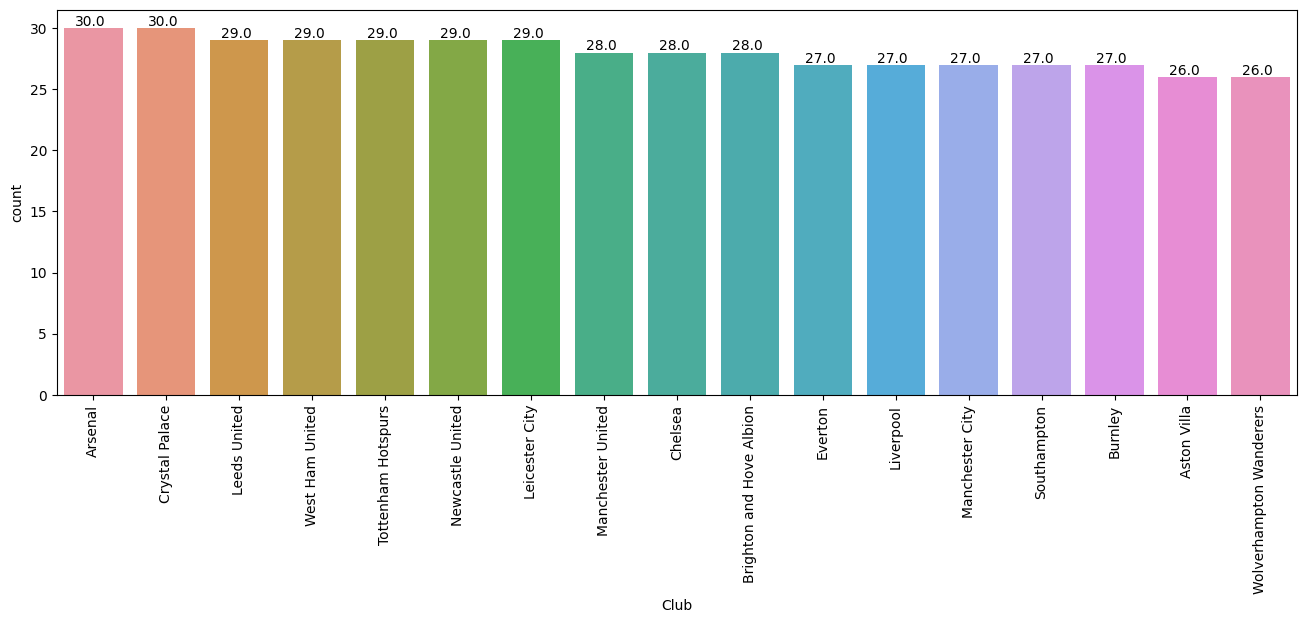

In [61]:
plt.figure(figsize = (16,5))
ax = sns.countplot(data = df, x ='Club', order = df.groupby(['Club'])['Player_Name'].count().sort_values(ascending = False).index)
plt.xticks(rotation = 90);

for i in range(len(ax.patches)):
  x = ax.patches[i].get_x() + ax.patches[i].get_width()/2 - 0.25
  y = ax.patches[i].get_height() + .2
  ax.annotate(ax.patches[i].get_height(), (x,y))

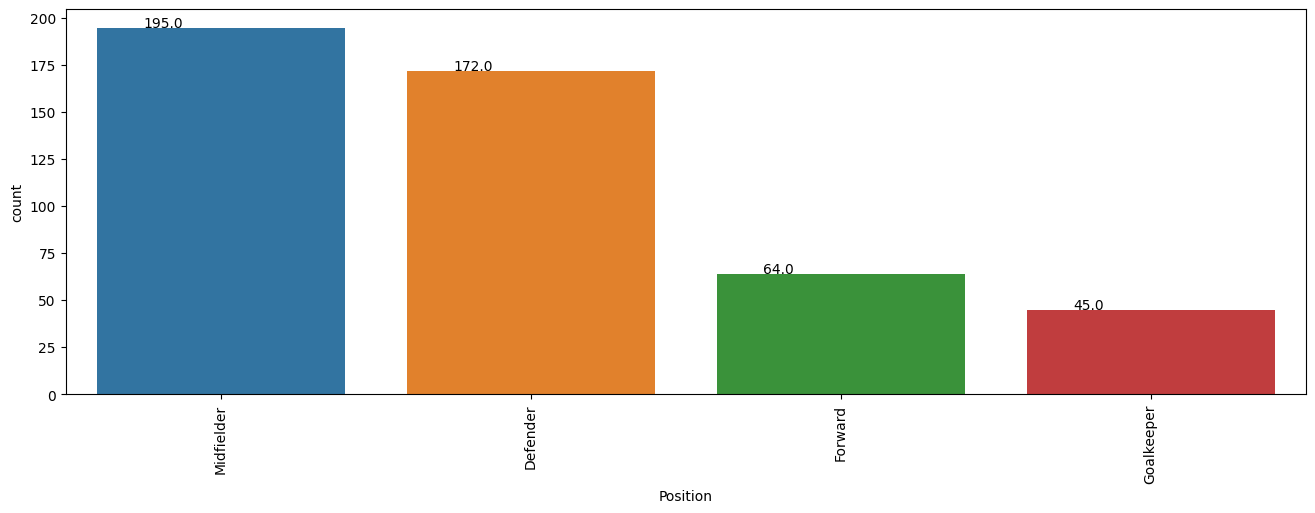

In [62]:
plt.figure(figsize = (16,5))
ax = sns.countplot(data = df, x ='Position', order = df.groupby(['Position'])['Player_Name'].count().sort_values(ascending = False).index)
plt.xticks(rotation = 90);

for i in range(len(ax.patches)):
  x = ax.patches[i].get_x() + ax.patches[i].get_width()/2 - 0.25
  y = ax.patches[i].get_height() + .2
  ax.annotate(ax.patches[i].get_height(), (x,y))

# **Bivariate Analyses**

<ipython-input-70-d8ddf34fa737>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True ,cmap = 'viridis')


<Axes: >

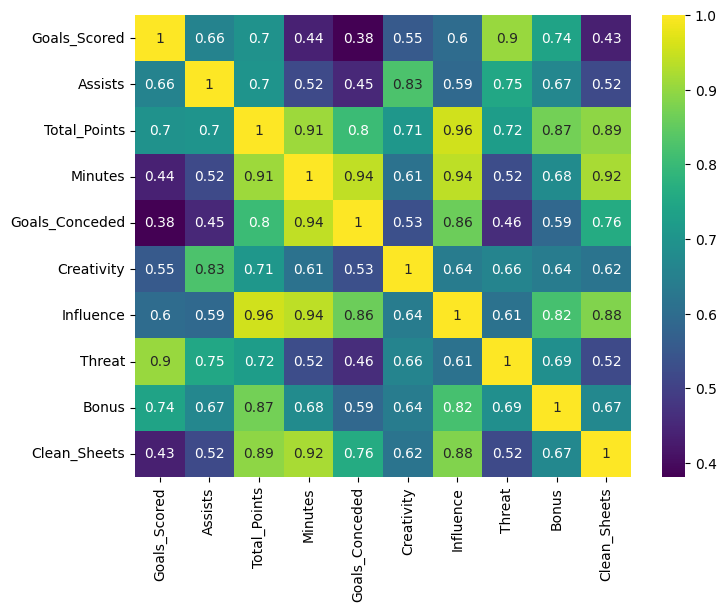

In [70]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot = True ,cmap = 'viridis')

<ipython-input-85-828db055b11c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x = 'Club', y = 'Total_Points', ci = None, order = df.groupby(['Club'])['Total_Points'].mean().sort_values(ascending = False).index);


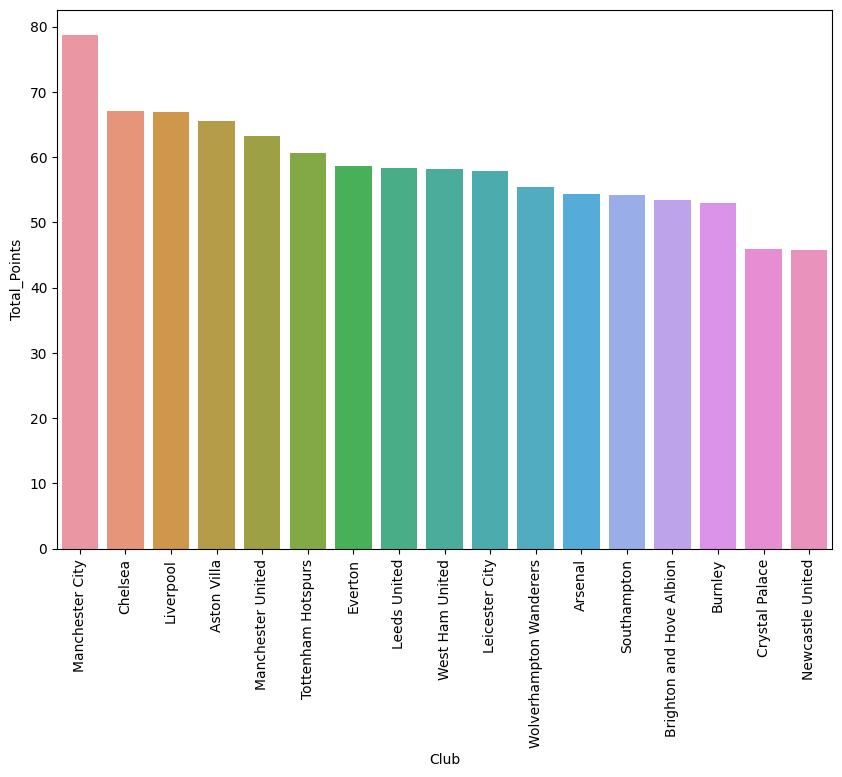

In [85]:
plt.figure(figsize = (10,7));
sns.barplot(data = df, x = 'Club', y = 'Total_Points', ci = None, order = df.groupby(['Club'])['Total_Points'].mean().sort_values(ascending = False).index);
plt.xticks(rotation = 90);

<ipython-input-86-adb543747548>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x = 'Position', y = 'Total_Points', ci = None, order = df.groupby(['Position'])['Total_Points'].mean().sort_values(ascending = False).index);


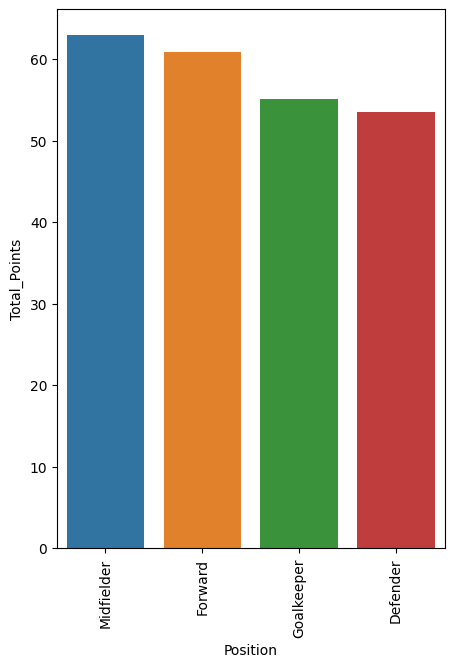

In [86]:
plt.figure(figsize = (5,7));
sns.barplot(data = df, x = 'Position', y = 'Total_Points', ci = None, order = df.groupby(['Position'])['Total_Points'].mean().sort_values(ascending = False).index);
plt.xticks(rotation = 90);

<ipython-input-90-60f344e9993a>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x = 'Position', y = 'Minutes', ci = None, order = df.groupby(['Position'])['Minutes'].mean().sort_values(ascending = False).index);


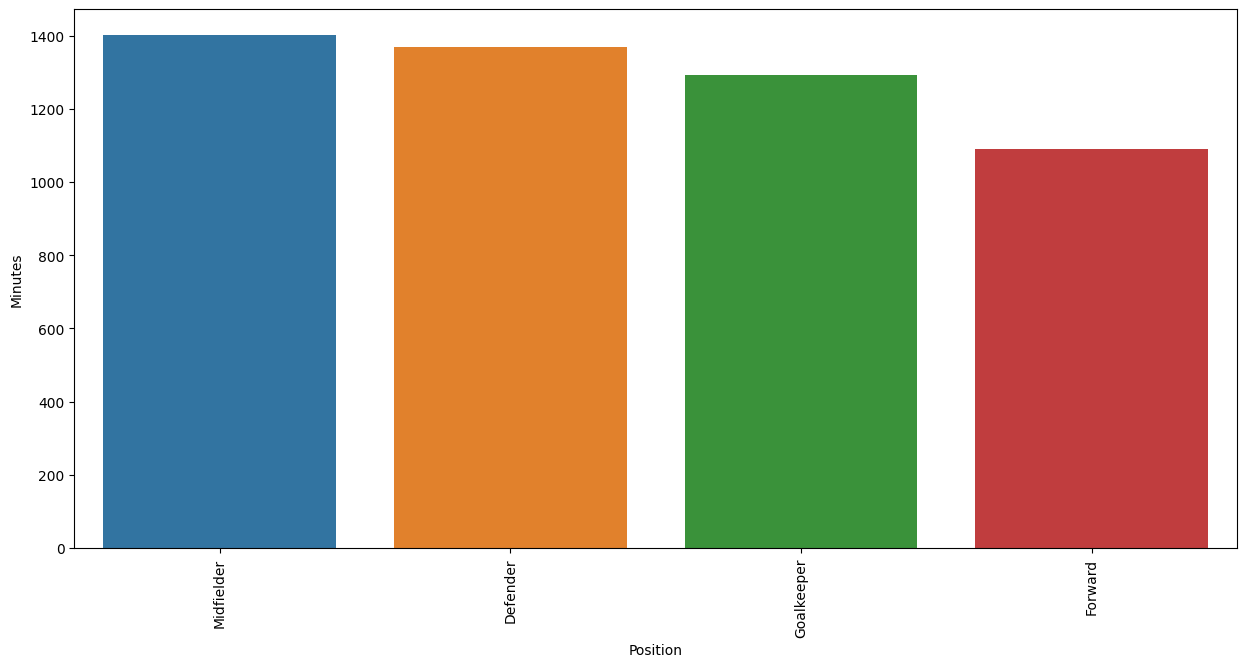

In [90]:
plt.figure(figsize = (15,7));
sns.barplot(data = df, x = 'Position', y = 'Minutes', ci = None, order = df.groupby(['Position'])['Minutes'].mean().sort_values(ascending = False).index);
plt.xticks(rotation = 90);

<ipython-input-88-9db22be40800>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x = 'Club', y = 'Bonus', ci = None, order = df.groupby(['Club'])['Bonus'].mean().sort_values(ascending = False).index);


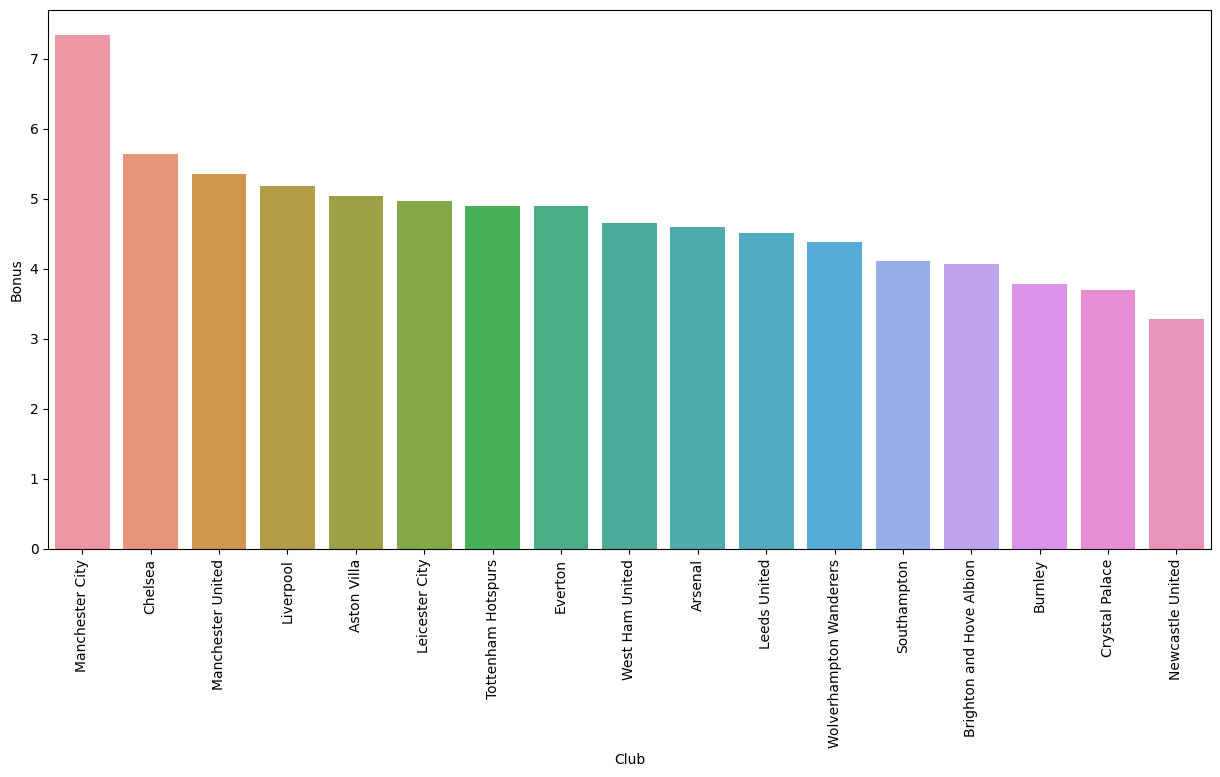

In [88]:
plt.figure(figsize = (15,7));
sns.barplot(data = df, x = 'Club', y = 'Bonus', ci = None, order = df.groupby(['Club'])['Bonus'].mean().sort_values(ascending = False).index);
plt.xticks(rotation = 90);

Lets see which player scored the most fantasy points last season for different poistions of play


In [6]:
df.head(5)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2


In [7]:
df.groupby(['Position'])['Total_Points'].max()

Position
Defender      171
Forward       242
Goalkeeper    186
Midfielder    244
Name: Total_Points, dtype: int64

In [17]:
df.loc[df[df['Position'] == 'Forward']['Total_Points'].sort_values(ascending = False).index[0],['Player_Name','Club','Position','Total_Points']]

Player_Name             Harry Kane
Club            Tottenham Hotspurs
Position                   Forward
Total_Points                   242
Name: 403, dtype: object

In [22]:
df.loc[df[df['Position'] == 'Goalkeeper']['Total_Points'].sort_values(ascending = False).index[0:3],['Player_Name','Club','Position','Total_Points']]

,Player_Name,Club,Position,Total_Points
36,Emiliano Martinez,Aston Villa,Goalkeeper,186
284,Ederson Moares,Manchester City,Goalkeeper,160
203,Illan Meslier,Leeds United,Goalkeeper,154


Lets see the top 3  players with the  most fantasy points last season for different poistions of play

In [34]:
df1 = df.loc[df[df['Position'] == 'Goalkeeper']['Total_Points'].sort_values(ascending = False).index[0:3],['Player_Name','Club','Position','Total_Points']]
df1

,Player_Name,Club,Position,Total_Points
36,Emiliano Martinez,Aston Villa,Goalkeeper,186
284,Ederson Moares,Manchester City,Goalkeeper,160
203,Illan Meslier,Leeds United,Goalkeeper,154


In [35]:
df2 = df.loc[df[df['Position'] == 'Midfielder']['Total_Points'].sort_values(ascending = False).index[0:3],['Player_Name','Club','Position','Total_Points']]
df1 = pd.concat([df1,df2])
df1

,Player_Name,Club,Position,Total_Points
36,Emiliano Martinez,Aston Villa,Goalkeeper,186
284,Ederson Moares,Manchester City,Goalkeeper,160
203,Illan Meslier,Leeds United,Goalkeeper,154
315,Bruno Fernandes,Manchester United,Midfielder,244
269,Mohamed Salah,Liverpool,Midfielder,231
405,Heung-Min Son,Tottenham Hotspurs,Midfielder,228


In [36]:
df2 = df.loc[df[df['Position'] == 'Defender']['Total_Points'].sort_values(ascending = False).index[0:3],['Player_Name','Club','Position','Total_Points']]
df1 = pd.concat([df1,df2])
df1

,Player_Name,Club,Position,Total_Points
36,Emiliano Martinez,Aston Villa,Goalkeeper,186
284,Ederson Moares,Manchester City,Goalkeeper,160
203,Illan Meslier,Leeds United,Goalkeeper,154
315,Bruno Fernandes,Manchester United,Midfielder,244
269,Mohamed Salah,Liverpool,Midfielder,231
405,Heung-Min Son,Tottenham Hotspurs,Midfielder,228
223,Stuart Dallas,Leeds United,Defender,171
257,Andrew Robertson,Liverpool,Defender,161
278,Trent Alexander-Arnold,Liverpool,Defender,160


In [38]:
df2 = df.loc[df[df['Position'] == 'Forward']['Total_Points'].sort_values(ascending = False).index[0:3],['Player_Name','Club','Position','Total_Points']]
df1 = pd.concat([df1,df2])
df1

,Player_Name,Club,Position,Total_Points
36,Emiliano Martinez,Aston Villa,Goalkeeper,186
284,Ederson Moares,Manchester City,Goalkeeper,160
203,Illan Meslier,Leeds United,Goalkeeper,154
315,Bruno Fernandes,Manchester United,Midfielder,244
269,Mohamed Salah,Liverpool,Midfielder,231
405,Heung-Min Son,Tottenham Hotspurs,Midfielder,228
223,Stuart Dallas,Leeds United,Defender,171
257,Andrew Robertson,Liverpool,Defender,161
278,Trent Alexander-Arnold,Liverpool,Defender,160
36,Emiliano Martinez,Aston Villa,Goalkeeper,186


In [41]:
df1 = df1.drop([36, 284,203])

In [43]:
df2 = df.loc[df[df['Position'] == 'Goalkeeper']['Total_Points'].sort_values(ascending = False).index[0:3],['Player_Name','Club','Position','Total_Points']]
df1 = pd.concat([df1,df2])
df1

,Player_Name,Club,Position,Total_Points
315,Bruno Fernandes,Manchester United,Midfielder,244
269,Mohamed Salah,Liverpool,Midfielder,231
405,Heung-Min Son,Tottenham Hotspurs,Midfielder,228
223,Stuart Dallas,Leeds United,Defender,171
257,Andrew Robertson,Liverpool,Defender,161
278,Trent Alexander-Arnold,Liverpool,Defender,160
403,Harry Kane,Tottenham Hotspurs,Forward,242
219,Patrick Bamford,Leeds United,Forward,194
238,Jamie Vardy,Leicester City,Forward,187
36,Emiliano Martinez,Aston Villa,Goalkeeper,186


In [45]:
num_cols = df.select_dtypes(np.number).columns.values
len(num_cols)

10

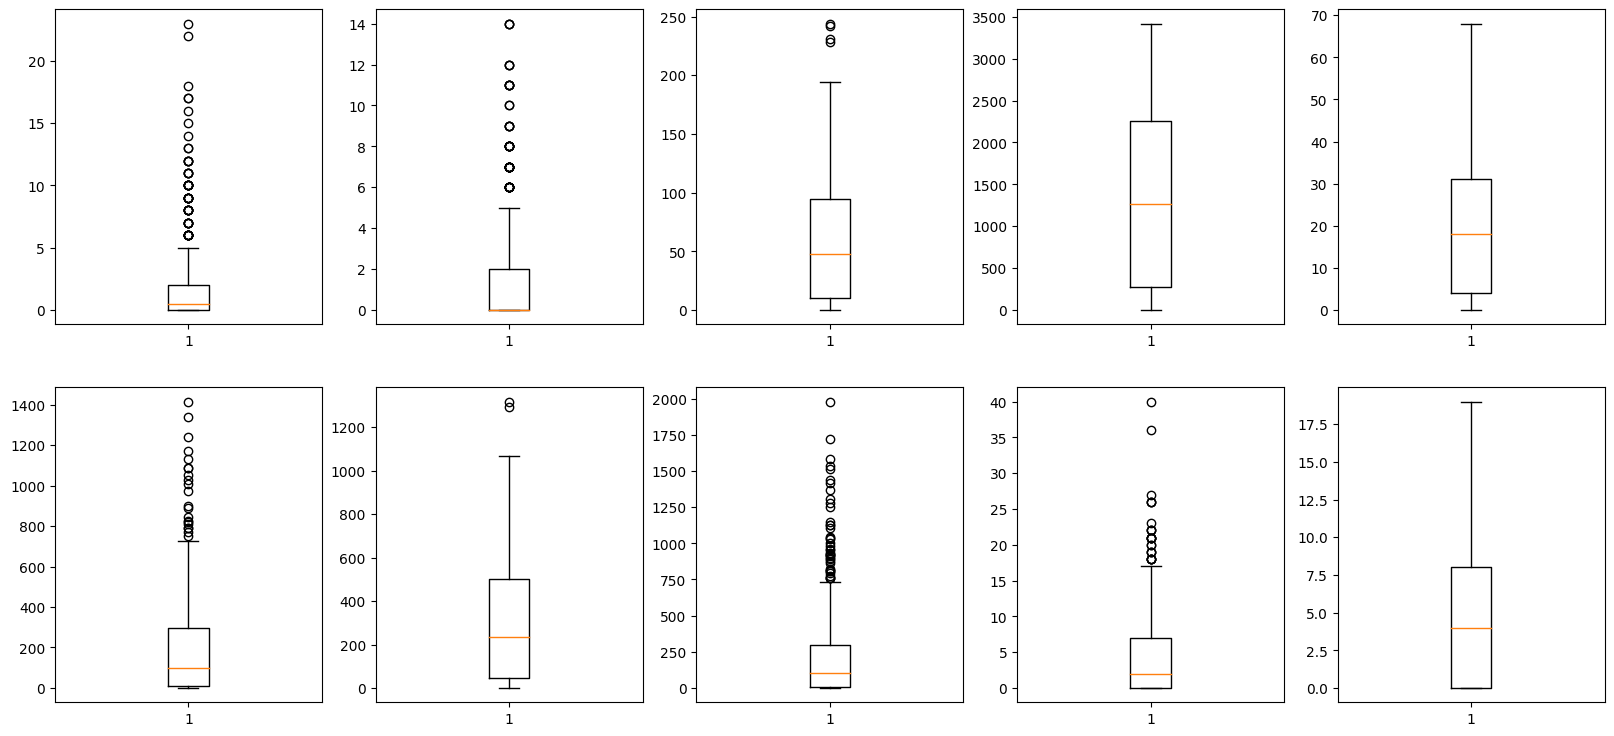

In [52]:
plt.figure(figsize=(20,9))
for i,j in enumerate(num_cols):

  plt.subplot(2,5, i+1)
  plt.boxplot(df[j])

# **Preprocessing of Data**

In [5]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler

In [6]:
num_cols = df.select_dtypes(np.number).columns.values
num_cols

array(['Goals_Scored', 'Assists', 'Total_Points', 'Minutes',
       'Goals_Conceded', 'Creativity', 'Influence', 'Threat', 'Bonus',
       'Clean_Sheets'], dtype=object)

In [7]:
scalar = StandardScaler()
scalar.fit(df[num_cols])
scaled_df = scalar.transform(df[num_cols])

In [8]:
scaled_df = pd.DataFrame(scaled_df,columns = num_cols)
scaled_df

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123
1,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521
2,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747
3,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328
4,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510
...,...,...,...,...,...,...,...,...,...,...
471,-0.552608,-0.647555,-1.122506,-1.086016,-0.763215,-0.679404,-0.984745,-0.707638,-0.755435,-1.081123
472,-0.552608,-0.647555,1.434108,1.858107,1.998971,-0.780115,1.753217,-0.707638,1.165778,1.196940
473,-0.552608,-0.277967,-0.634602,-0.771839,-0.700438,-0.067576,-0.802314,-0.481156,-0.755435,-1.081123
474,-0.262915,-0.277967,-0.361377,-0.215271,-0.386553,-0.119723,-0.766426,0.097632,-0.275132,0.057909


###Performing PCA for Dimensionality reduction

In [9]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=scaled_df.shape[1], random_state = 0)
pca.fit(scaled_df)
pca_df = pca.transform(scaled_df)

In [10]:
pca_df = pd.DataFrame(pca_df)
pca_df

,0,1,2,3,4,5,6,7,8,9
0,-2.916600,0.569939,-0.041871,0.190663,0.003485,0.008158,-0.042314,0.064757,0.057486,0.006269
1,3.815468,1.999554,-2.216345,0.757341,-0.119000,-0.541975,-0.233941,-0.293053,0.075356,-0.238019
2,1.943396,-2.757446,-0.958238,0.816920,0.041188,0.376978,0.005235,0.138392,-0.306183,-0.136656
3,3.502427,1.043441,0.581995,-0.969567,0.415848,-0.358456,0.661746,0.376272,-0.260200,-0.155934
4,-1.153639,0.422189,0.642307,0.269271,-0.271583,0.405367,-0.033575,0.098886,-0.035234,-0.034877
...,...,...,...,...,...,...,...,...,...,...
471,-2.686929,0.350179,0.012579,-0.028976,-0.226985,-0.079117,-0.016498,-0.025886,0.114191,0.056974
472,2.333559,-3.137873,-1.051056,0.486420,-0.652311,0.294376,0.067490,0.094238,-0.214251,0.007010
473,-1.966630,0.469243,0.474989,-0.098289,-0.221093,-0.163924,-0.057647,0.129321,-0.267969,-0.017272
474,-0.818000,0.180940,0.103096,-0.112637,0.423414,-0.064093,0.399416,-0.300399,-0.000771,-0.068806


In [11]:
pca_df.var()/sum(pca_df.var())

0    0.721489
1    0.136593
2    0.058800
3    0.031384
4    0.022745
5    0.015227
6    0.007008
7    0.003937
8    0.001945
9    0.000870
dtype: float64

In [12]:
sum(pca.explained_variance_ratio_[:5]) # More than 97% of the varation of the data can be represented by 5 features

0.9710123249796081

# **K-Means Clusteting**

In [13]:
from sklearn.cluster import KMeans

In [14]:
model = KMeans(n_clusters=2)
model.fit(pca_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [20]:
model.predict(pca_df)

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,

<Axes: xlabel='0', ylabel='1'>

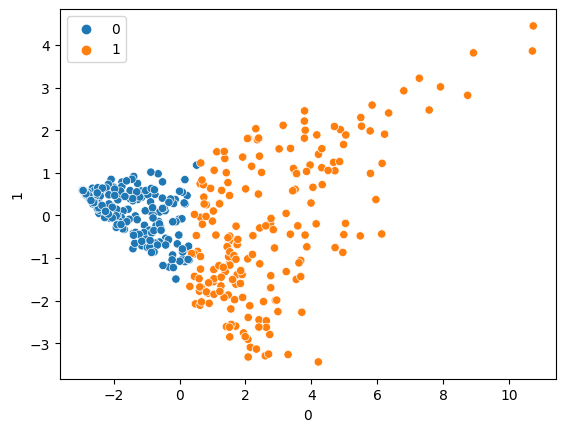

In [19]:
sns.scatterplot(x = pca_df.iloc[:,0], y = pca_df.iloc[:,1], hue = model.predict(pca_df))

In [21]:
clusters = range(1,10)

In [22]:
from scipy.spatial.distance import cdist
distortion = []

for k in clusters:

  model = KMeans(n_clusters = k)
  model.fit(pca_df)
  y = model.predict(pca_df)

  distortion.append(
  sum(np.min(cdist(pca_df, model.cluster_centers_), axis = 1))/pca_df.shape[0]
  )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Elbow Analyses')

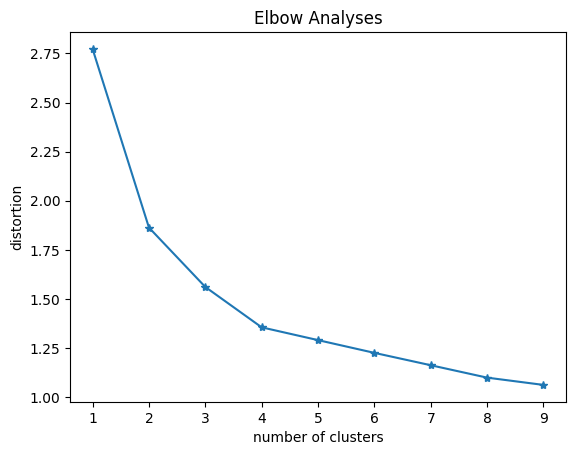

In [23]:
plt.plot(clusters, distortion, '-*')
plt.xlabel('number of clusters')
plt.ylabel('distortion')
plt.title('Elbow Analyses')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='0', ylabel='1'>

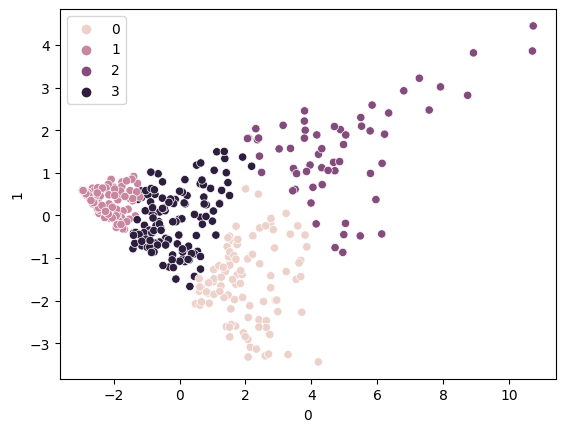

In [26]:
model = KMeans(n_clusters = 4)
model.fit(pca_df)
sns.scatterplot(x = pca_df.iloc[:,0], y = pca_df.iloc[:,1], hue = model.predict(pca_df))

In [27]:
df.head(2)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7


In [29]:
model_kmeans = model

In [32]:
df_kmeans = scaled_df.copy()
df_kmeans['labels'] = model_kmeans.labels_
df_kmeans.head()

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,labels
0,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123,1
1,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521,2
2,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747,0
3,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328,2
4,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510,3


In [33]:
cluster_kmeans = df_kmeans.groupby(['labels']).mean()
cluster_kmeans['Count'] = df_kmeans.groupby(['labels'])['Goals_Scored'].count()

In [35]:
cluster_kmeans.style.highlight_max()

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,Count
labels,,,,,,,,,,,
0,-0.157572,0.046822,0.878391,1.243324,1.153068,0.277435,1.063813,-0.079665,0.473624,1.201542,99
1,-0.509462,-0.572851,-0.950286,-1.023786,-0.955887,-0.667973,-0.940016,-0.612500,-0.689862,-0.953891,188
2,2.107739,1.834844,1.632197,1.044480,0.901421,1.700404,1.381376,2.062155,1.848876,1.026086,60
3,-0.116945,-0.054496,-0.048362,0.052046,0.088897,-0.030321,-0.088969,-0.005368,-0.218041,-0.009197,129


In [36]:
cluster_kmeans.style.highlight_min(color = 'lightgreen')

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,Count
labels,,,,,,,,,,,
0,-0.157572,0.046822,0.878391,1.243324,1.153068,0.277435,1.063813,-0.079665,0.473624,1.201542,99
1,-0.509462,-0.572851,-0.950286,-1.023786,-0.955887,-0.667973,-0.940016,-0.612500,-0.689862,-0.953891,188
2,2.107739,1.834844,1.632197,1.044480,0.901421,1.700404,1.381376,2.062155,1.848876,1.026086,60
3,-0.116945,-0.054496,-0.048362,0.052046,0.088897,-0.030321,-0.088969,-0.005368,-0.218041,-0.009197,129
